In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [7]:
data = pd.read_csv('C:/Users/Jaya Karthika/Downloads/BStatement.csv',index_col = 'Date', parse_dates = True)

In [8]:
data.head()

,Description,Money out,Money in,Balance
Date,,,,
2017-01-01,PayPal Transfer,NaN,648.0,4508.0
2017-01-02,Receipt # 124,NaN,4174.0,8682.0
2017-01-03,Rip-off from McDonalds,266.0,NaN,8416.0
2017-01-04,PayPal Transfer,NaN,1281.0,9697.0
2017-01-05,Another rip-off from McDonalds,315.0,NaN,9382.0


In [9]:
data.fillna(0, inplace = True)
data.head()

,Description,Money out,Money in,Balance
Date,,,,
2017-01-01,PayPal Transfer,0.0,648.0,4508.0
2017-01-02,Receipt # 124,0.0,4174.0,8682.0
2017-01-03,Rip-off from McDonalds,266.0,0.0,8416.0
2017-01-04,PayPal Transfer,0.0,1281.0,9697.0
2017-01-05,Another rip-off from McDonalds,315.0,0.0,9382.0


In [10]:
def labeler(x):
    if 'Receipt' in x:
        return 'Sales'
    elif 'McDonalds' in x:
        return 'Restaurant'
    else:
        return x

In [49]:
data['updated description'] = data['Description'].apply(labeler)

In [50]:
data.head()

,Description,Money out,Money in,Balance,upadated description,updated description
Date,,,,,,
2017-01-01,PayPal Transfer,0.0,648.0,4508.0,PayPal Transfer,PayPal Transfer
2017-01-02,Receipt # 124,0.0,4174.0,8682.0,Sales,Sales
2017-01-03,Rip-off from McDonalds,266.0,0.0,8416.0,Restaurant,Restaurant
2017-01-04,PayPal Transfer,0.0,1281.0,9697.0,PayPal Transfer,PayPal Transfer
2017-01-05,Another rip-off from McDonalds,315.0,0.0,9382.0,Restaurant,Restaurant


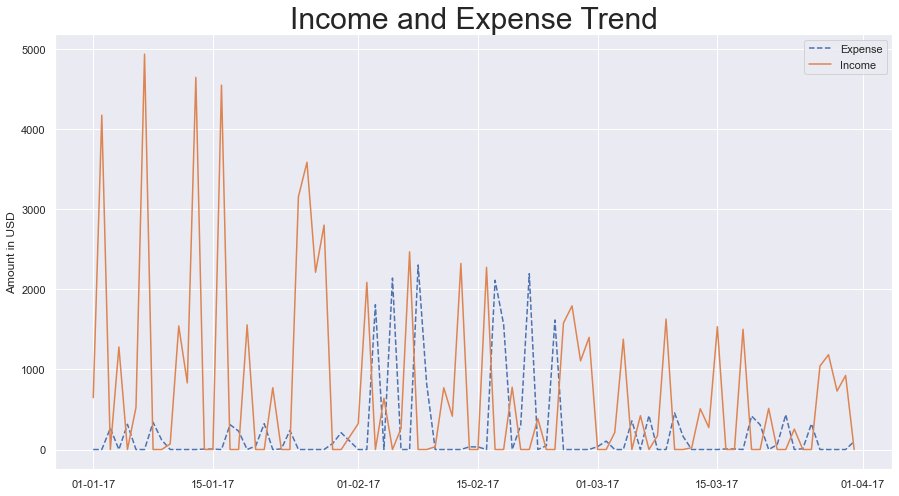

In [25]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15,8) 
x = data.index
y1 = data['Money out']
y2 = data['Money in']
ax1.plot(x,y1, linestyle = '--', label = 'Expense')
ax1.plot(x,y2, label = 'Income')

ax1.legend()
ax1.set_ylabel('Amount in USD')
ax1.set_title('Income and Expense Trend', size = 30)

from matplotlib.dates import DateFormatter
mf = DateFormatter('%d-%m-%y')
ax1.xaxis.set_major_formatter(mf)

## Monthly Trend

In [26]:
monthly_trend = data.groupby([data.index.year, data.index.month]).sum()

In [30]:
monthly_trend.head()

Money out  Money in     Balance
Date Date                                    
2017 1      2488.800000  37292.00   662836.20
     2     14977.518451  18646.00  1321179.50
     3      3212.180328  12306.36  1907150.69

Text(0.5, 0, '')

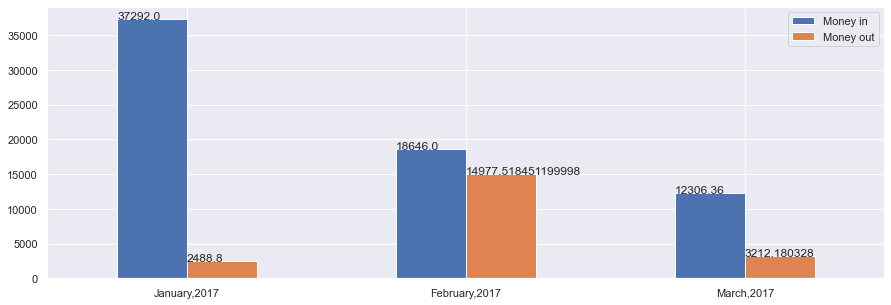

In [39]:
fig, ax1 = plt.subplots()
monthly_trend[['Money in', 'Money out']].plot(kind='bar', ax=ax1, rot = 0)
fig.set_size_inches(15,5)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
ax1.set_xlabel('')

In [37]:
import calendar
new_index = []
for y, m in monthly_trend.index:
    new_index.append(calendar.month_name[m]+","+str(y))
monthly_trend.index = new_index    

In [38]:
monthly_trend

,Money out,Money in,Balance
"January,2017",2488.800000,37292.00,662836.20
"February,2017",14977.518451,18646.00,1321179.50
"March,2017",3212.180328,12306.36,1907150.69


In [46]:
filter_exp = data['Money out']!=0
filter_inc = data['Money in']!=0

In [53]:
exp_breakdown = data[filter_exp].groupby('updated description').sum()
inc_breakdown = data[filter_inc].groupby('updated description').sum()

In [54]:
exp_breakdown.head()

,Money out,Money in,Balance
updated description,,,
Electronics,3099.573276,0.0,118066.520
Fuel,411.447780,0.0,140905.286
Insurance,2102.955320,0.0,138140.156
Interest Expense,153.607171,0.0,403333.962
Internet,2176.101592,0.0,141278.606


In [55]:
inc_breakdown.head()

,Money out,Money in,Balance
updated description,,,
Other,0.0,5462.55,299398.702
PayPal Transfer,0.0,11812.65,820780.196
Sales,0.0,50969.16,959531.894


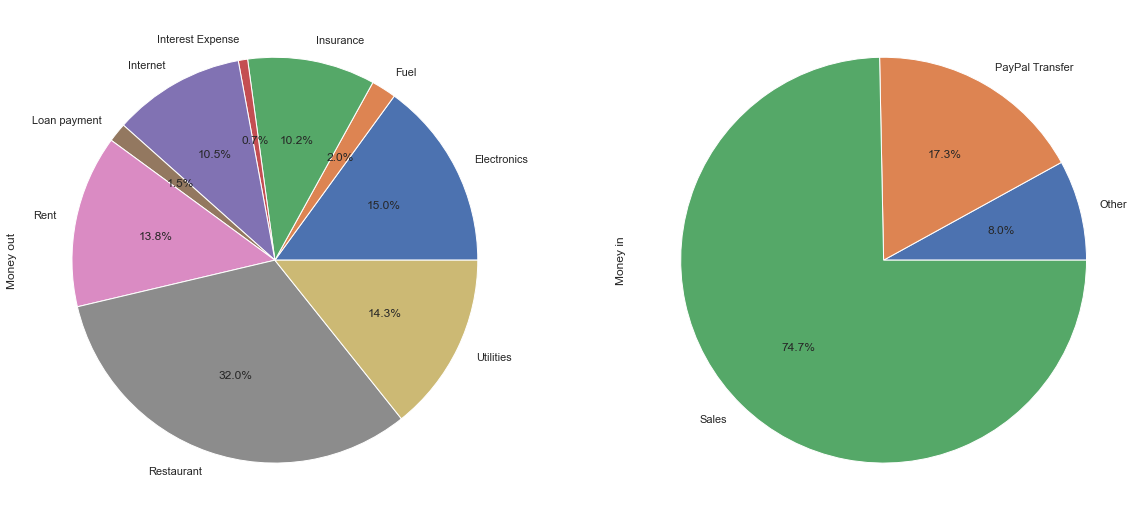

In [60]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,10)
exp_breakdown['Money out'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_aspect('equal')
inc_breakdown['Money in'].plot(kind='pie',ax=ax2, autopct='%1.1f%%')
ax2.set_aspect('equal')